# Importing necessary libraries

In [1]:
!pip install statistics

  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=4018cdcb7418dc9c4fb26d55850ffda9c68a410a39745a758738c914818118e3
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Insights of the data

In [3]:
df = pd.read_csv('/content/train_2.csv')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


# Insights of the data

### Features

Date - Date in daily basis from 2013 to 2016. Date_time series feature

store - The stores from 1 to 10. Continuous feature

Item - The items sold in the stores named between 1 to 50. Continuous Feature

### Target

Sales - The number of items sold in each store on that particular day. Continuous Feature. This is not the target variable.

The cumulative sales of each item through a 3 month rolling window is the target variable



# Generic Cleaning

In [4]:
df.shape

(913000, 4)

In [5]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [6]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [8]:
# The date column is in the form of strings.
# Converting it to date_time series
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.groupby(['item','date'], as_index=False)['sales'].agg({'sales':'sum'})

In [11]:
df

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


# Deriving new columns from 'date' column

In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_of_week
df['day_of_year'] = df['date'].dt.day_of_year
df['days_in_month'] = df['date'].dt.days_in_month
df['quarter'] = df['date'].dt.quarter
df['is_leap_year'] = df['date'].dt.is_leap_year
df['is_month_start'] = df['date'].dt.is_month_start
df['is_month_end'] = df['date'].dt.is_month_end
df['is_quarter_start'] = df['date'].dt.is_quarter_start
df['is_quarter_end'] = df['date'].dt.is_quarter_end
df['is_year_start'] = df['date'].dt.is_year_start
df['is_year_end'] = df['date'].dt.is_year_end

# Converting all the columns to numerical columns

In [13]:
df['is_leap_year'] = df['is_leap_year'].astype(int)
df['is_month_start'] = df['is_month_start'].astype(int)
df['is_month_end'] = df['is_month_end'].astype(int)
df['is_quarter_start'] = df['is_quarter_start'].astype(int)
df['is_quarter_end'] = df['is_quarter_end'].astype(int)
df['is_year_start'] = df['is_year_start'].astype(int)
df['is_year_end'] = df['is_year_end'].astype(int)

In [14]:
df.dtypes

item                         int64
date                datetime64[ns]
sales                        int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
day_of_year                  int64
days_in_month                int64
quarter                      int64
is_leap_year                 int64
is_month_start               int64
is_month_end                 int64
is_quarter_start             int64
is_quarter_end               int64
is_year_start                int64
is_year_end                  int64
dtype: object

In [15]:
df.columns

Index(['item', 'date', 'sales', 'year', 'month', 'day', 'day_of_week',
       'day_of_year', 'days_in_month', 'quarter', 'is_leap_year',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end'],
      dtype='object')

In [16]:
df.shape

(91300, 17)

# Preparing 90 days rolling window data

In [17]:
df1 = df.copy()

In [18]:
n = len(df1['item'].unique())
n

50

In [19]:
for i in range(1,n+1):
  df1.loc[df1['item'].isin([i]), 'target'] = df1.loc[df1['item'].isin([i]),'sales'].rolling(90, center=True, min_periods=1).sum().fillna(0)

In [20]:
df1.isnull().sum()

item                0
date                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_leap_year        0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
target              0
dtype: int64

In [21]:
df1.dtypes

item                         int64
date                datetime64[ns]
sales                        int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
day_of_year                  int64
days_in_month                int64
quarter                      int64
is_leap_year                 int64
is_month_start               int64
is_month_end                 int64
is_quarter_start             int64
is_quarter_end               int64
is_year_start                int64
is_year_end                  int64
target                     float64
dtype: object

In [22]:
df1['target'] = df1['target'].astype(int)

In [23]:
del df1['sales']

# Distriution of target

<ipython-input-24-df04d315dc2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['target'])


Text(0.5, 1.0, 'Distribution of target value')

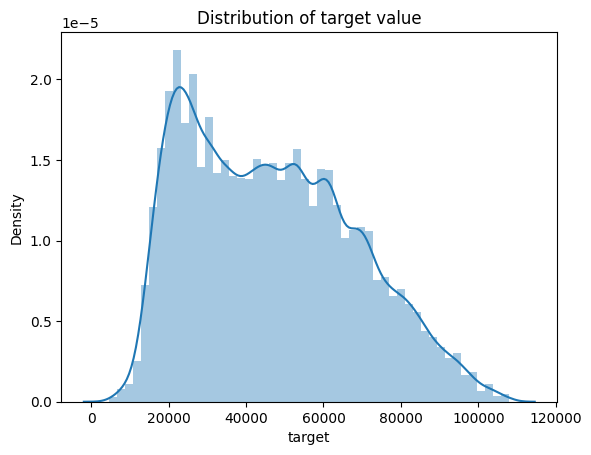

In [24]:
sns.distplot(df1['target'])
plt.title('Distribution of target value')

Text(0.5, 1.0, 'Distribution of target value')

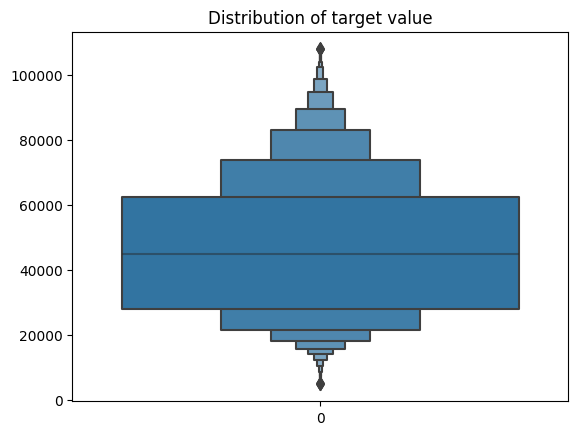

In [25]:
sns.boxenplot(df1['target'])
plt.title('Distribution of target value')

# From the Distribution of target values, it is seen that, the larger number of values are in the range 25000 to 60000 and median is around 45000

# Feature v/s Target Plots

Text(0.5, 1.0, 'Date v/s Target Plot')

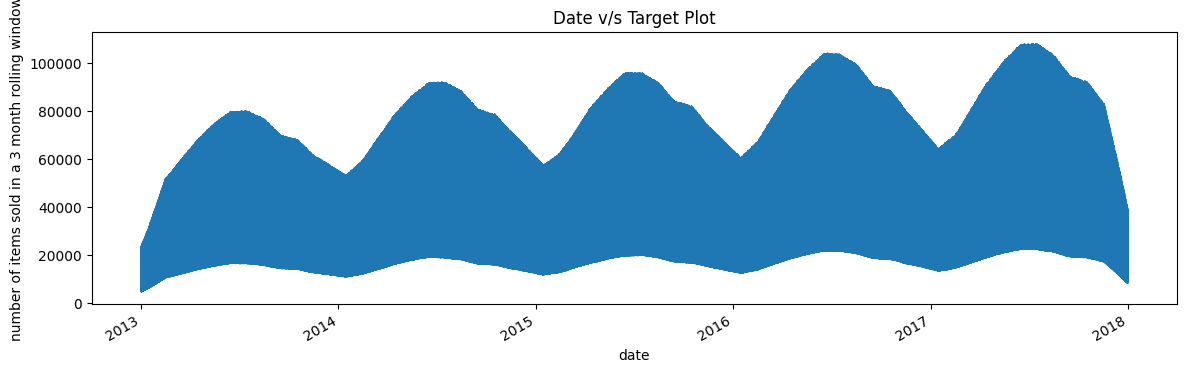

In [26]:
plt.figure(figsize=(14,4))
df1.set_index('date')['target'].plot(kind='line')
plt.ylabel('number of items sold in a 3 month rolling window')
plt.title('Date v/s Target Plot')

# with respect to date column, the target have slightly upward trending cyclic pattern

Text(0.5, 1.0, 'Year v/s Target Plot')

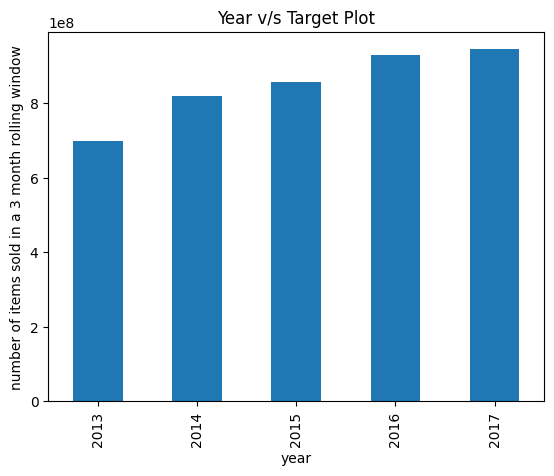

In [27]:
df1.groupby(['year'])['target'].sum().plot(kind='bar')
plt.ylabel('number of items sold in a 3 month rolling window')
plt.title('Year v/s Target Plot')

# Based on the result, The number of items sold is increasing linearly with increase in year

Text(0.5, 1.0, 'Month v/s Target Plot')

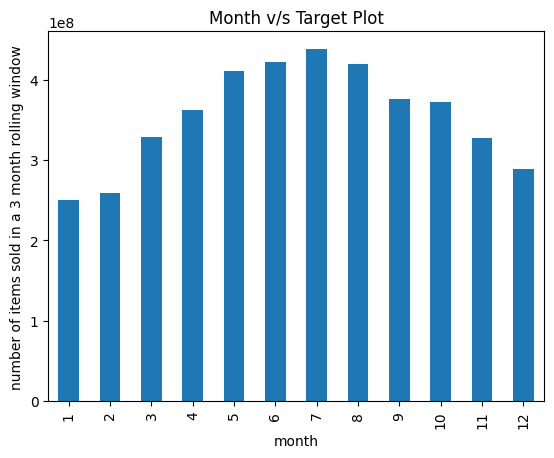

In [28]:
df1.groupby(['month'])['target'].sum().plot(kind='bar')
plt.ylabel('number of items sold in a 3 month rolling window')
plt.title('Month v/s Target Plot')

# Based on the result, The number of items sold is very high in the months of May, June, July, August. And, it is lowest in the months of Jan, Feb and Dec

Text(0.5, 1.0, 'Day_of_week v/s Target Plot')

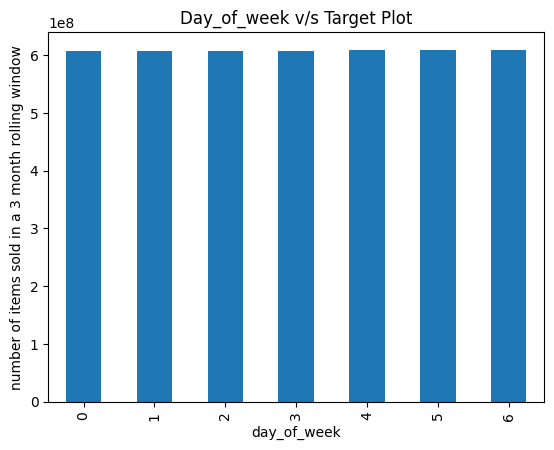

In [29]:
df1.groupby(['day_of_week'])['target'].sum().plot(kind='bar')
plt.ylabel('number of items sold in a 3 month rolling window')
plt.title('Day_of_week v/s Target Plot')

# Based on the results, the number of items sold are approximately the same in all the days of the week

Text(0.5, 1.0, 'Quarter v/s Target Plot')

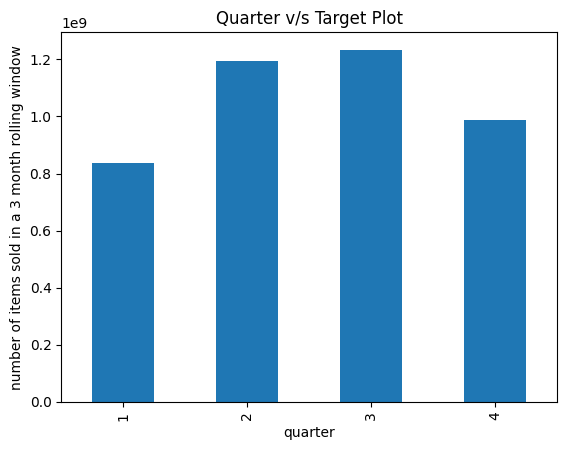

In [30]:
df1.groupby(['quarter'])['target'].sum().plot(kind='bar')
plt.ylabel('number of items sold in a 3 month rolling window')
plt.title('Quarter v/s Target Plot')

# The number of items sold are high in 2nd and 3rd quarter of each year than in the 1st and 4th quarter.

# Splitting the data into train and test

In [31]:
train_df1 = df1.loc[df1['year'].isin([2013,2014,2015,2016])].reset_index()
train_df1.drop('index', axis=1, inplace=True)
train_df1

,item,date,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,target
0,1,2013-01-01,2013,1,1,1,1,31,1,0,1,0,1,0,1,0,5712
1,1,2013-01-02,2013,1,2,2,2,31,1,0,0,0,0,0,0,0,5832
2,1,2013-01-03,2013,1,3,3,3,31,1,0,0,0,0,0,0,0,5986
3,1,2013-01-04,2013,1,4,4,4,31,1,0,0,0,0,0,0,0,6165
4,1,2013-01-05,2013,1,5,5,5,31,1,0,0,0,0,0,0,0,6272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,50,2016-12-27,2016,12,27,1,362,31,4,1,0,0,0,0,0,0,51590
73046,50,2016-12-28,2016,12,28,2,363,31,4,1,0,0,0,0,0,0,51285
73047,50,2016-12-29,2016,12,29,3,364,31,4,1,0,0,0,0,0,0,51021
73048,50,2016-12-30,2016,12,30,4,365,31,4,1,0,0,0,0,0,0,51084


In [32]:
test_df1 =  df1.loc[df1['year'].isin([2017])].reset_index()
test_df1.drop('index', axis=1, inplace=True)
test_df1

,item,date,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,target
0,1,2017-01-01,2017,1,1,6,1,31,1,0,1,0,1,0,1,0,16992
1,1,2017-01-02,2017,1,2,0,2,31,1,0,0,0,0,0,0,0,16957
2,1,2017-01-03,2017,1,3,1,3,31,1,0,0,0,0,0,0,0,16884
3,1,2017-01-04,2017,1,4,2,4,31,1,0,0,0,0,0,0,0,16791
4,1,2017-01-05,2017,1,5,3,5,31,1,0,0,0,0,0,0,0,16710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017-12-27,2017,12,27,2,361,31,4,0,0,0,0,0,0,0,31899
18246,50,2017-12-28,2017,12,28,3,362,31,4,0,0,0,0,0,0,0,31002
18247,50,2017-12-29,2017,12,29,4,363,31,4,0,0,0,0,0,0,0,30365
18248,50,2017-12-30,2017,12,30,5,364,31,4,0,0,0,0,0,0,0,29664


# Linear Regression item-wise

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_lr = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model1 = LinearRegression()
  model1.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model1.predict(x_te)))
  r2_lr.append(r2_score(y_te, model1.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_lr),2))



For item  1 r2 score is 0.060664076537892075
For item  2 r2 score is 0.13765553941127473
For item  3 r2 score is 0.1208920576964706
For item  4 r2 score is 0.10981248877747918
For item  5 r2 score is 0.16428359444255491
For item  6 r2 score is 0.14005875205485563
For item  7 r2 score is 0.13522181175449866
For item  8 r2 score is 0.1541764511107344
For item  9 r2 score is 0.06478235246472719
For item  10 r2 score is 0.14750430975025386
For item  11 r2 score is 0.17730858666381444
For item  12 r2 score is 0.14176766289344145
For item  13 r2 score is 0.1334281971865312
For item  14 r2 score is 0.1389801211427687
For item  15 r2 score is 0.11819394230611635
For item  16 r2 score is 0.11043865410211706
For item  17 r2 score is 0.12943507046396352
For item  18 r2 score is 0.15799433826463727
For item  19 r2 score is 0.15625416703803252
For item  20 r2 score is 0.07102582061456986
For item  21 r2 score is 0.17177375405573425
For item  22 r2 score is 0.11554103537783889
For item  23 r2 score 

# Linear Regression for overall data

In [49]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_lr.predict(x_test)))


r2 score:  0.0277015827881244


# KNN Algorithm item-wise

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import math

r2_knn = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  scaler = StandardScaler()
  x_tr = scaler.fit_transform(x_tr)
  x_te = scaler.transform(x_te)
  k = round(math.sqrt(len(x_tr))/2)
  model2 = KNeighborsRegressor(k)
  model2.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model2.predict(x_te)))
  r2_knn.append(r2_score(y_te, model2.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_knn),2))

For item  1 r2 score is 0.47136616555143707
For item  2 r2 score is 0.4404193502110836
For item  3 r2 score is 0.44813692033831576
For item  4 r2 score is 0.5000065712397601
For item  5 r2 score is 0.41294046958585584
For item  6 r2 score is 0.446903355105448
For item  7 r2 score is 0.4658610047164661
For item  8 r2 score is 0.4272182282083775
For item  9 r2 score is 0.46600602075046005
For item  10 r2 score is 0.4193051745050427
For item  11 r2 score is 0.434596018535772
For item  12 r2 score is 0.4557408170709474
For item  13 r2 score is 0.4334397761772878
For item  14 r2 score is 0.4334174281942762
For item  15 r2 score is 0.4472775796909715
For item  16 r2 score is 0.4427565420515128
For item  17 r2 score is 0.4499420136914305
For item  18 r2 score is 0.43695434706185565
For item  19 r2 score is 0.4160637841770275
For item  20 r2 score is 0.4572786698627652
For item  21 r2 score is 0.43459364091453745
For item  22 r2 score is 0.45288894595362317
For item  23 r2 score is 0.425817839

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import math

r2_knn_2 = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  scaler = StandardScaler()
  x_tr = scaler.fit_transform(x_tr)
  x_te = scaler.transform(x_te)
  model2 = KNeighborsRegressor()
  model2.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model2.predict(x_te)))
  r2_knn_2.append(r2_score(y_te, model2.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_knn_2),2))

For item  1 r2 score is 0.5909700788170276
For item  2 r2 score is 0.5587451462572823
For item  3 r2 score is 0.5668921346870253
For item  4 r2 score is 0.6179539644704599
For item  5 r2 score is 0.5290750368284638
For item  6 r2 score is 0.563477011914866
For item  7 r2 score is 0.5855954102922352
For item  8 r2 score is 0.5454576177537823
For item  9 r2 score is 0.5867547936425248
For item  10 r2 score is 0.5349716970095928
For item  11 r2 score is 0.5516122342118277
For item  12 r2 score is 0.5728772862011984
For item  13 r2 score is 0.5520907007874891
For item  14 r2 score is 0.5505731981749211
For item  15 r2 score is 0.567340999316539
For item  16 r2 score is 0.5626502316785287
For item  17 r2 score is 0.5695531555095981
For item  18 r2 score is 0.5550902549761524
For item  19 r2 score is 0.5292560195593701
For item  20 r2 score is 0.5771132642752557
For item  21 r2 score is 0.5495246718923703
For item  22 r2 score is 0.5713964180426603
For item  23 r2 score is 0.5435311979899375

# KNN Algorithm for the overall data

In [63]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model_knn = KNeighborsRegressor()
model_knn.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_knn.predict(x_test)))

r2 score:  0.22219419452977285


# Decision Tree item-wise

In [67]:
from sklearn.tree import DecisionTreeRegressor

r2_dt = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model3 = DecisionTreeRegressor(max_depth = round(np.log(15)/np.log(2)), random_state=1)
  model3.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model3.predict(x_te)))
  r2_dt.append(r2_score(y_te, model3.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_dt),2))

For item  1 r2 score is 0.6201794104961836
For item  2 r2 score is 0.37906571968808556
For item  3 r2 score is 0.5643494376264544
For item  4 r2 score is 0.6173987287621344
For item  5 r2 score is 0.35227094821141003
For item  6 r2 score is 0.41334318602645725
For item  7 r2 score is 0.5898040309322927
For item  8 r2 score is 0.5711952148198478
For item  9 r2 score is 0.5773741952294966
For item  10 r2 score is 0.5584951939344271
For item  11 r2 score is 0.3601632280078496
For item  12 r2 score is 0.5818239548132292
For item  13 r2 score is 0.5736703905245892
For item  14 r2 score is 0.36207979170974613
For item  15 r2 score is 0.5819581888647745
For item  16 r2 score is 0.5633111026170252
For item  17 r2 score is 0.43575539891890513
For item  18 r2 score is 0.5709158610589217
For item  19 r2 score is 0.3538133436325587
For item  20 r2 score is 0.5750329759535865
For item  21 r2 score is 0.36789478705990586
For item  22 r2 score is 0.5913285777067734
For item  23 r2 score is 0.35448010

In [68]:
from sklearn.tree import DecisionTreeRegressor

r2_dt_2 = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model3 = DecisionTreeRegressor(random_state=1)
  model3.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model3.predict(x_te)))
  r2_dt_2.append(r2_score(y_te, model3.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_dt_2),2))

For item  1 r2 score is 0.7895698559908759
For item  2 r2 score is 0.5869316354260716
For item  3 r2 score is 0.6166432702285106
For item  4 r2 score is 0.8852274365563324
For item  5 r2 score is 0.8105078741946476
For item  6 r2 score is 0.6231119269560319
For item  7 r2 score is 0.6849535514148422
For item  8 r2 score is 0.6229356921273498
For item  9 r2 score is 0.6253306585595302
For item  10 r2 score is 0.8095752796898196
For item  11 r2 score is 0.6218106947776115
For item  12 r2 score is 0.6748041430110479
For item  13 r2 score is 0.8330540705714817
For item  14 r2 score is 0.6173689094405312
For item  15 r2 score is 0.8596793012451636
For item  16 r2 score is 0.5536493381784453
For item  17 r2 score is 0.5715597729201154
For item  18 r2 score is 0.6116996464687179
For item  19 r2 score is 0.6123813185654394
For item  20 r2 score is 0.6648589751159695
For item  21 r2 score is 0.8156633232515718
For item  22 r2 score is 0.605466883799144
For item  23 r2 score is 0.860385959425331

# Decision Tree for the overall data

In [69]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_dt.predict(x_test)))

r2 score:  0.9387849070275115


# Random Forest item-wise

In [70]:
from sklearn.ensemble import RandomForestRegressor
r2_rf = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model4 = RandomForestRegressor(max_depth = round(np.log(15)/np.log(2)), random_state=1, max_features = 'sqrt')
  model4.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model4.predict(x_te)))
  r2_rf.append(r2_score(y_te, model4.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_rf),2))

For item  1 r2 score is 0.27713640478938373
For item  2 r2 score is 0.25829156004062204
For item  3 r2 score is 0.24448596930175448
For item  4 r2 score is 0.34001349819712634
For item  5 r2 score is 0.22480955779098433
For item  6 r2 score is 0.2936941168800985
For item  7 r2 score is 0.28895812160224776
For item  8 r2 score is 0.2644691932445038
For item  9 r2 score is 0.2668557243855152
For item  10 r2 score is 0.23425597265810172
For item  11 r2 score is 0.26376376764138165
For item  12 r2 score is 0.28331053474476564
For item  13 r2 score is 0.24932732310850902
For item  14 r2 score is 0.261717156336135
For item  15 r2 score is 0.2778040539850375
For item  16 r2 score is 0.25930078359955533
For item  17 r2 score is 0.29443935028874946
For item  18 r2 score is 0.26206773030193886
For item  19 r2 score is 0.24193360701053057
For item  20 r2 score is 0.2562165239821652
For item  21 r2 score is 0.2765411418191315
For item  22 r2 score is 0.2796180211893655
For item  23 r2 score is 0.2

In [71]:
from sklearn.ensemble import RandomForestRegressor
r2_rf_2 = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model4 = RandomForestRegressor(random_state=1, max_features = 'sqrt')
  model4.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model4.predict(x_te)))
  r2_rf_2.append(r2_score(y_te, model4.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_rf_2),2))

For item  1 r2 score is 0.673088745832735
For item  2 r2 score is 0.6594611923109035
For item  3 r2 score is 0.6574354440628345
For item  4 r2 score is 0.7038761269572631
For item  5 r2 score is 0.6564544494930249
For item  6 r2 score is 0.6675764819177399
For item  7 r2 score is 0.692823387323636
For item  8 r2 score is 0.6447233531550918
For item  9 r2 score is 0.6878562502716883
For item  10 r2 score is 0.6368596566558025
For item  11 r2 score is 0.6525522062589364
For item  12 r2 score is 0.6707614478122201
For item  13 r2 score is 0.659998506308439
For item  14 r2 score is 0.6466441495102195
For item  15 r2 score is 0.6509960648044009
For item  16 r2 score is 0.6511478796112962
For item  17 r2 score is 0.6826346738726914
For item  18 r2 score is 0.6710011322728493
For item  19 r2 score is 0.6240471226699662
For item  20 r2 score is 0.6720497190380277
For item  21 r2 score is 0.6500120705132326
For item  22 r2 score is 0.6709187128657687
For item  23 r2 score is 0.6649881611142103


In [72]:
from sklearn.ensemble import RandomForestRegressor
r2_rf_3 = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model4 = RandomForestRegressor(random_state=1)
  model4.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model4.predict(x_te)))
  r2_rf_3.append(r2_score(y_te, model4.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_rf_3),2))

For item  1 r2 score is 0.7713820922237005
For item  2 r2 score is 0.7655521590585328
For item  3 r2 score is 0.7575406149922649
For item  4 r2 score is 0.8036818580297094
For item  5 r2 score is 0.7611110539201249
For item  6 r2 score is 0.763800648379463
For item  7 r2 score is 0.7940324427432842
For item  8 r2 score is 0.7423933168048346
For item  9 r2 score is 0.7472386981934097
For item  10 r2 score is 0.740649150011775
For item  11 r2 score is 0.7752027062422155
For item  12 r2 score is 0.765041063813722
For item  13 r2 score is 0.77706754328074
For item  14 r2 score is 0.7505249596422191
For item  15 r2 score is 0.7733908124981188
For item  16 r2 score is 0.7537116693261998
For item  17 r2 score is 0.7956301820382536
For item  18 r2 score is 0.7595271061464134
For item  19 r2 score is 0.7310817185638825
For item  20 r2 score is 0.7599566754220664
For item  21 r2 score is 0.766898233934149
For item  22 r2 score is 0.7668291612450508
For item  23 r2 score is 0.7433816848659555
For

# Random Forest for the overall data

In [73]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
model_rf = RandomForestRegressor(random_state=1)
model_rf.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_rf.predict(x_test)))

r2 score:  0.9517946801484832


# Gradient Boosting item-wise

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
r2_gb = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model5 = GradientBoostingRegressor()
  model5.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model5.predict(x_te)))
  r2_gb.append(r2_score(y_te, model5.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_gb),2))

For item  1 r2 score is 0.7593008435050138
For item  2 r2 score is 0.7298856633961831
For item  3 r2 score is 0.7760707144345181
For item  4 r2 score is 0.8274928469053053
For item  5 r2 score is 0.754309941365565
For item  6 r2 score is 0.7472272448300703
For item  7 r2 score is 0.7609912033678675
For item  8 r2 score is 0.684220771122371
For item  9 r2 score is 0.7760068913382567
For item  10 r2 score is 0.7308628616954411
For item  11 r2 score is 0.7296824360809648
For item  12 r2 score is 0.7754335132714558
For item  13 r2 score is 0.7805480069706056
For item  14 r2 score is 0.7514542880303825
For item  15 r2 score is 0.7804822632756997
For item  16 r2 score is 0.724166582259832
For item  17 r2 score is 0.754295247325028
For item  18 r2 score is 0.7873094029018122
For item  19 r2 score is 0.7776962427268667
For item  20 r2 score is 0.8025376526135689
For item  21 r2 score is 0.7383063749152818
For item  22 r2 score is 0.7437040584302796
For item  23 r2 score is 0.7330179248468442
F

# Gradient boosting for the overall data

In [75]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
model_gb = GradientBoostingRegressor(random_state=1)
model_gb.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_gb.predict(x_test)))

r2 score:  0.7367448752545578


# Extreme Gradient Boosting item-wise

In [76]:
import xgboost as xgb
r2_xgb = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model6 = xgb.XGBRegressor(colsample_bytree=0.4, random_state=1, verbosity=0)
  model6.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model6.predict(x_te)))
  r2_xgb.append(r2_score(y_te, model6.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_xgb),2))

For item  1 r2 score is 0.6900842268140743
For item  2 r2 score is 0.684484772912639
For item  3 r2 score is 0.667917748035161
For item  4 r2 score is 0.7218480336154377
For item  5 r2 score is 0.67007335266201
For item  6 r2 score is 0.6920796391814539
For item  7 r2 score is 0.6969516171281881
For item  8 r2 score is 0.670648141344921
For item  9 r2 score is 0.6821481372513166
For item  10 r2 score is 0.6581252324972721
For item  11 r2 score is 0.6860471862051126
For item  12 r2 score is 0.6885743764370096
For item  13 r2 score is 0.6775929096038904
For item  14 r2 score is 0.6805649598871584
For item  15 r2 score is 0.6825588601464296
For item  16 r2 score is 0.6590233129228044
For item  17 r2 score is 0.7055851937416204
For item  18 r2 score is 0.6800933585180495
For item  19 r2 score is 0.6566882665922351
For item  20 r2 score is 0.6740714522453137
For item  21 r2 score is 0.6823079258851021
For item  22 r2 score is 0.6828464279497668
For item  23 r2 score is 0.675374051795642
For

In [35]:
import xgboost as xgb
r2_xgb_2 = []

for i in range(1,51):
  x_tr = train_df1.loc[train_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_tr = train_df1.loc[train_df1['item'] == i, 'target']
  x_te = test_df1.loc[test_df1['item'] == i, ['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']]
  y_te = test_df1.loc[test_df1['item'] == i, 'target']
  model6 = xgb.XGBRegressor()
  model6.fit(x_tr,y_tr)
  print('For item ', i, 'r2 score is', r2_score(y_te, model6.predict(x_te)))
  r2_xgb_2.append(r2_score(y_te, model6.predict(x_te)))

print('Average r2 score of all 50 items: ', round(st.mean(r2_xgb_2),2))

For item  1 r2 score is 0.8487970511217298
For item  2 r2 score is 0.8563358229178415
For item  3 r2 score is 0.8472967729773816
For item  4 r2 score is 0.8636289250037708
For item  5 r2 score is 0.8487467101304338
For item  6 r2 score is 0.8546078438038143
For item  7 r2 score is 0.8577183880114647
For item  8 r2 score is 0.8536684645046322
For item  9 r2 score is 0.840742758226647
For item  10 r2 score is 0.8388664569481306
For item  11 r2 score is 0.8649436899164913
For item  12 r2 score is 0.8567401746083027
For item  13 r2 score is 0.8527695792523119
For item  14 r2 score is 0.8588996143637324
For item  15 r2 score is 0.8512681049609401
For item  16 r2 score is 0.8328012394639385
For item  17 r2 score is 0.8601879114851386
For item  18 r2 score is 0.8511442621033112
For item  19 r2 score is 0.835626409403109
For item  20 r2 score is 0.8455047793799598
For item  21 r2 score is 0.8526843504520477
For item  22 r2 score is 0.8472948124295288
For item  23 r2 score is 0.8529295665938682

# Extreme Gradient Boosting for the overall data

In [42]:
x_train = train_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_train = train_df1['target'].values
x_test = test_df1[['item','year','month','day','day_of_week','day_of_year','days_in_month','quarter','is_leap_year','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']].values
y_test = test_df1['target'].values
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train,y_train)
print('r2 score: ', r2_score(y_test, model_xgb.predict(x_test)))

r2 score:  0.9673469386109872
